# Binomial Distribution

Discrete probability distribution of the number of successes of `n` independent [bernoulli experiments](bernoulli_distribution.ipynb).

We use the following variables:
* n — number of trials
* k — number of successes
* p — probability of a single success

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

### Probability Mass Function (PMF)
What's the chance that we'll have `k` successes in `n` events? For that, we need to many times we can have `k` successes in `n` events. That's where the `binomial coefficient` comes into play.

$$Pr(X = k) = {n\choose k} p^k (1-p)^{n-k}$$

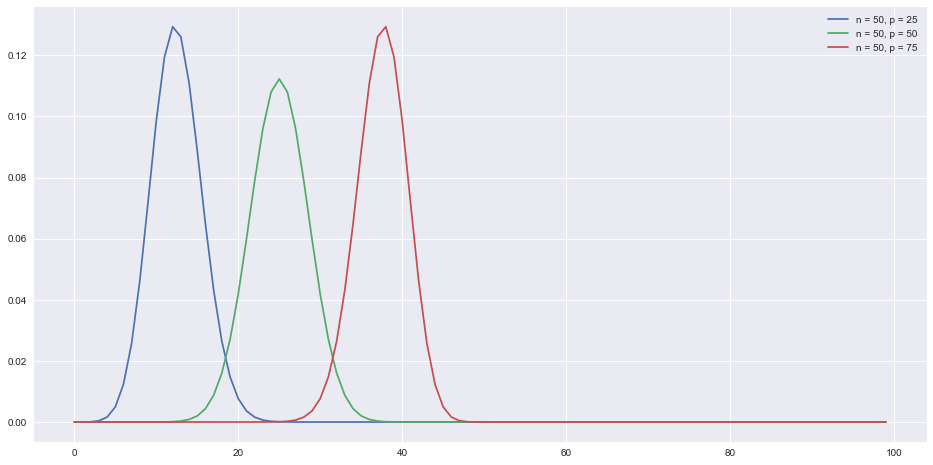

In [17]:
import scipy as sp
import scipy.special
import scipy.stats

def pmf(n, k, p):
    return sp.special.comb(n, k) * (p ** k) * (1 - p) ** (n - k)

plt.figure(figsize=(16, 8))
x = np.arange(100)
for p in np.arange(25, 100, 25):
    y = [pmf(50, i, p / 100) for i in x]
    plt.plot(x, y, label=f"n = 50, p = {p}")
plt.legend();

In [31]:
eps = 1e-4
for n in range(10, 200, 10):
    dist = sp.stats.distributions.binom(n, 0.5)
    assert abs(dist.pmf(1) - pmf(n, 1, 0.5)) < eps

### Cumulative Distribution Function (CDF)

$$P(X \leq k) = \sum_{i=0}^{k} {n\choose i} p^k (1-p)^{n-k}$$

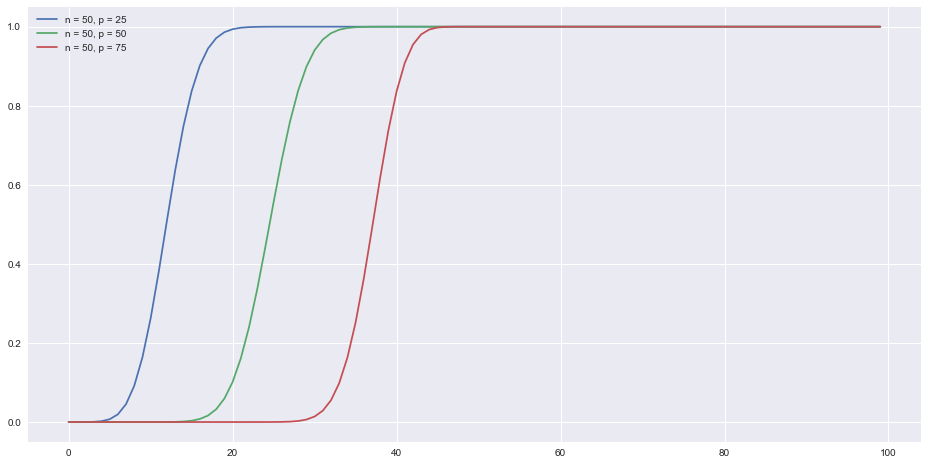

In [27]:
def cdf(n, k, p):
    return sum([pmf(n, i, p) for i in range(0, k+1)])

plt.figure(figsize=(16, 8))
x = np.arange(100)
for p in np.arange(25, 100, 25):
    y = [cdf(50, i, p / 100) for i in x]
    plt.plot(x, y, label=f"n = 50, p = {p}")
plt.legend();

In [32]:
eps = 1e-4
for n in range(10, 200, 10):
    dist = sp.stats.distributions.binom(n, 0.5)
    assert abs(dist.cdf(1) - cdf(n, 1, 0.5)) < eps

### Resources:
[Wikipedia — Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)